<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chargement des données

On télécharge un script depuis Github permettant de télécharger un fichier stocké sur GoogleDrive, puis on utilise ce script écrit en Python pour télécharger le fichier `bitcoin.zip`. Enfin, on décompresse les données pour obtenir le fichier `bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv` :

In [3]:
!git clone https://github.com/chentinghao/download_google_drive.git
!python download_google_drive/download_gdrive.py "1FZsEdpBm-AQ2L9n_pMnm6336-O_IVo7z" "/content/bitcoin.zip"
!unzip bitcoin.zip

Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
100MB [00:01, 73.0MB/s] 
Archive:  bitcoin.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


Charge la série sous Pandas et affiche les informations du fichier :

In [4]:
# Création de la série sous Pandas
serie = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
serie

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Pré-traitement des données

**1. Recherche des erreurs dans les données**

On commence par vérifier qu'il ne manque pas de dates. Pour cela, on vérifie qu'il y a bien 60 secondes entre deux Timestamp. Si on trouve un décalage non cohérent, on enregistre les informations dans une liste.

In [ ]:
def recherche_erreur(fenetre):
  if fenetre.values[1] - fenetre.values[0] != 60:
    Timestamp_Errors.append(fenetre.values)
  return 0

Timestamp_Errors = []
serie.Timestamp.rolling(2).apply(recherche_erreur)

On affiche les erreurs trouvées :

In [4]:
for erreur in Timestamp_Errors:
  print (pd.to_datetime(Timestamp_Errors[0],unit="s"))
  print((Timestamp_Errors[0][1] - Timestamp_Errors[0][0])/60 - 1)

DatetimeIndex(['2015-01-05 09:12:00', '2015-01-09 21:05:00'], dtype='datetime64[ns]', freq=None)
6472.0


On observe qu'il manque des données entre le 5 janvier 2015 à 9:12:00 et le 9 janvier 2015 à 21:05:00, soit 6472 données.

Recherchons maintenant le nombre de données manquantes :

In [8]:
data_manquantes = sum(np.isnan(serie['Open']))
print ("Nombre de données manquantes : %s" %data_manquantes)

Nombre de données manquantes : 1243608


On a donc en tout : 6472 + 1243608 = 1250080 données manquantes.

**2. Identification des erreurs**

On convertit maintenant les `Timestamp` (mesure de temps exprimé en seconde écoulé depuis le 01/01/1970 - 00:00:00 UTC) en format plus standard :

In [5]:
# Convesion des timestamp en date
serie.Timestamp = pd.to_datetime(serie['Timestamp'], unit="s")
serie

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


On demande maintenant à échantillonner les données sur 60 secondes :

In [6]:
serie_minute = serie.set_index('Timestamp').resample('60s').asfreq()
data_manquantes = sum(np.isnan(serie_minute['Open']))
print ("Nombre de données manquantes : %s" %data_manquantes)
serie_minute

Nombre de données manquantes : 1250080


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


On obtient en tout 4863849 données après échantillonnage, soit (4863849-4857377) =  6472 données supplémentaires. Ceci est cohérent avec ce qu'on avait trouvé avant. Il manque 1250080 données. 

**3. Correction des données**

Pour corriger les données, on va tout simplement utiliser la fonction [fillna](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html) :

In [88]:
serie_minute = serie_minute.fillna(method="backfill")

In [89]:
data_manquantes = sum(np.isnan(serie_minute['Open']))
print ("Nombre de données manquantes : %s" %data_manquantes)
serie_minute

Nombre de données manquantes : 0


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


**4. Affichage des données**

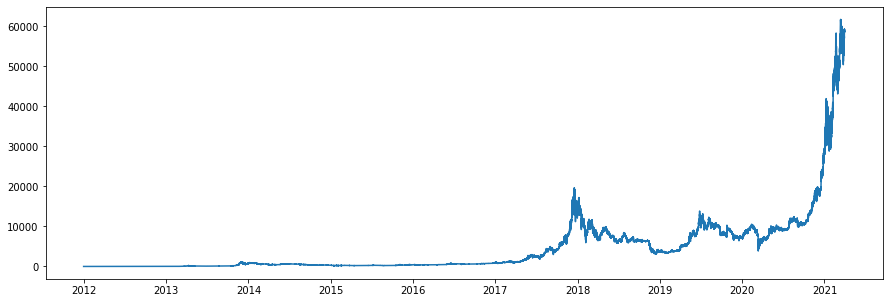

In [90]:
# Récupère les prix à l'ouverture
prix_ouverture = np.asarray(serie_minute.Open)
dates_ouverture = np.asarray(serie_minute.index)
temps_ouverture = np.asarray(serie_minute.reset_index().index.copy())

# Affiche la série
plt.figure(figsize=(15,5))
plt.plot(dates_ouverture, prix_ouverture)

# Préparation des données pour les prédictions

On va réaliser des prédictions sur une série journalière

In [95]:
serie_jour = serie.set_index('Timestamp').resample('1D').asfreq()
serie_jour = serie_jour.fillna(method="backfill")
data_manquantes = sum(np.isnan(serie_jour['Open']))
print ("Nombre de données manquantes : %s" %data_manquantes)
serie_jour

Nombre de données manquantes : 0


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.93,4.93,4.93,4.93,6.110463,30.124582,4.930000
2012-01-01,4.93,4.93,4.93,4.93,6.110463,30.124582,4.930000
2012-01-02,4.93,4.93,4.93,4.93,6.110463,30.124582,4.930000
2012-01-03,4.93,4.93,4.93,4.93,6.110463,30.124582,4.930000
2012-01-04,4.93,4.93,4.93,4.93,6.110463,30.124582,4.930000
...,...,...,...,...,...,...,...
2021-03-27,55081.26,55300.00,55081.26,55261.73,8.781130,484506.899450,55175.914921
2021-03-28,55817.85,55920.82,55807.12,55920.82,0.770004,43011.953916,55859.414172
2021-03-29,55790.28,55822.98,55777.98,55804.36,1.731449,96636.546983,55812.518695
